# Linear Regression on House Prices (1D) with Keras

All Rights Reserved © <a href="http://www.louisdorard.com">Louis Dorard</a>

<img src="http://s3.louisdorard.com.s3.amazonaws.com/DL_icon.png">

In this notebook we show how to perform linear regression on house prices data, using Keras.

## Define `X_train` and `y_train`

Run [House Prices 1D](House-Prices-1D.ipynb) notebook to create `data`

In [310]:
#%run House-Prices-1D.ipynb

In [311]:
%matplotlib inline
import pandas
from pandas import read_csv
data = read_csv('../04-house-prices/origin-trainfull.csv', index_col=0)
test = read_csv('../04-house-prices/origin-test.csv', index_col=0)

In [312]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


Output is `SalePrice`

In [313]:
Y_train = data.SalePrice

In [314]:
Y_train.shape

(1460,)

In [315]:
from numpy import transpose
Y_train = transpose([Y_train])

In [316]:
Y_train.shape

(1460, 1)

In [317]:
X_train = data.drop('SalePrice', axis=1)
train_and_test = X_train.append(test)

In [318]:
train_and_test = train_and_test.fillna(0)

In [319]:
del train_and_test['MSSubClass']
train_and_test = train_and_test.select_dtypes(exclude=['object'])

In [320]:
train_and_test = train_and_test.dropna(axis=1)

In [321]:
train_and_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006


In [322]:
train_and_test.shape

(2919, 35)

In [323]:
X_train = train_and_test[:1460].astype(float)
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,953.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1457,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,589.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1458,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,877.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0


In [324]:
test = train_and_test[1460:].astype(float)
test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,...,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1462,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,...,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
1463,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,...,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
1464,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,...,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
1465,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,...,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,546.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0
2916,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,294.0,...,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
2917,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,...,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0


## Visualize data in 2D

Initialize plotting lib

In [325]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('dark_background')

The idea here is to find a line that "fits" the data.

## About Keras

* High-level API: describe NN structure in simple and convenient way
* Exists in TensorFlow, and outside (can use other libraries such as MXNet as numerical backend)

## Model relationship between `x` and  `y`

We're looking for `W` and `b` such that <!-- .element: class="fragment" -->

`x * W + b` is a good approximation of `y` <!-- .element: class="fragment" -->

for all `(x, y)` input-output pairs in training. <!-- .element: class="fragment" -->

Main model type in Keras is sequence of "layers", called `Sequential`. In our case:

* 1 input layer (for `x`)
* 1 output layer (for `y`)

In [326]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Activation
model = Sequential()

Alternative network creation:

In [327]:
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Dense(1)
])

## Choose "loss" to minimize

* Error = difference between prediction `x * W + b` and true output `y`
* Compute Mean Squared Error over whole dataset
* MSE is a "loss function"; the smaller, the better
* Loss value depends on `W`, `b`, and dataset
    * => We want values of `W` and `b` that minimize loss on given training set.

In [328]:
loss = 'mse'

## Set up optimizer and "compile" model

Idea: iterative way to find lowest point of mountain, blindfolded?

* “What is the direction of steepest descent under my feet?” => _gradient_
* Follow gradient by a certain step size, called _learning step_ (or _learning rate_ ).
    
This is called _(Stochastic) Gradient Descent_.

![Gradient Descent - Aurélien Géron](figures/GD-Geron.png)

(See Figure 4-3 in _Hands-on ML_ book by Aurélien Géron)

In Keras, optimizer is specified when "compiling" model.

(Last step to fix model training code!)

In [329]:
from tensorflow.keras.optimizers import SGD
LEARNING_RATE = 0.01
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))

Remarks:

* Procedure starts from random value => need to consider random number generator seed!
* Figure is in 1D, but 2 Dimensions when going down a mountain...
* Our linear regression problem is in 2D, because 2 parameters to learn (`W` and `b`)
* Benefits of "compiling" to be discussed in future notebook.

### Scale features

"Normalizing" the data should help prevent values from "exploding":

In [330]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
test = scaler.transform(test)

## Fit model (i.e. run optimization)

The model still hasn't "seen" any data yet...

* With SGD we can choose the amount of data to be used to compute the loss function (`BATCH_SIZE`). This can be useful when the whole dataset doesn't fit in memory. We'll revisit this later!
* We need to choose for how many iterations to run SGD (`EPOCHS`).
* The `fit` method is a loop over epochs and batches!

In [331]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 200 # how many iterations over the whole dataset
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1460 samples
Epoch 1/200
1460/1460 [==============================] - 0s 123us/sample - loss: 39039356928.0000
Epoch 2/200
1460/1460 [==============================] - 0s 2us/sample - loss: 36530769920.0000
Epoch 3/200
1460/1460 [==============================] - 0s 2us/sample - loss: 34379120640.0000
Epoch 4/200
1460/1460 [==============================] - 0s 2us/sample - loss: 32504688640.0000
Epoch 5/200
1460/1460 [==============================] - 0s 2us/sample - loss: 30847614976.0000
Epoch 6/200
1460/1460 [==============================] - 0s 2us/sample - loss: 29362857984.0000
Epoch 7/200
1460/1460 [==============================] - 0s 1us/sample - loss: 28016433152.0000
Epoch 8/200
1460/1460 [==============================] - 0s 1us/sample - loss: 26782636032.0000
Epoch 9/200
1460/1460 [==============================] - 0s 1us/sample - loss: 25641918464.0000
Epoch 10/200
1460/1460 [==============================] - 0s 1us/sample - loss: 24579344384.0000
Epoch 11/200
14

Epoch 86/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2304899072.0000
Epoch 87/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2262263808.0000
Epoch 88/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2221302528.0000
Epoch 89/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2181947904.0000
Epoch 90/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2144135040.0000
Epoch 91/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2107804800.0000
Epoch 92/200
1460/1460 [==============================] - 0s 1us/sample - loss: 2072898176.0000
Epoch 93/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2039359488.0000
Epoch 94/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2007134464.0000
Epoch 95/200
1460/1460 [==============================] - 0s 3us/sample - loss: 1976170752.0000
Epoch 96/200
1460/1460 [================

Epoch 171/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1246288896.0000
Epoch 172/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1244724224.0000
Epoch 173/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1243215616.0000
Epoch 174/200
1460/1460 [==============================] - 0s 1us/sample - loss: 1241760384.0000
Epoch 175/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1240357760.0000
Epoch 176/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1239004288.0000
Epoch 177/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1237699456.0000
Epoch 178/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1236440320.0000
Epoch 179/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1235225728.0000
Epoch 180/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1234053760.0000
Epoch 181/200
1460/1460 [=====

[Plot data again](#Visualize-data).

### Reset model

Simplest way to reset all weights & biases is to re-execute the definition of `model`.

We can then fit again.

Remarks:

* Procedure starts from random value => need to consider random number generator seed!
* Figure is in 1D, but 2 Dimensions when going down a mountain...
* Our linear regression problem is in 2D, because 2 parameters to learn (`W` and `b`)
* Benefits of "compiling" to be discussed in future notebook.

## Review learning curve

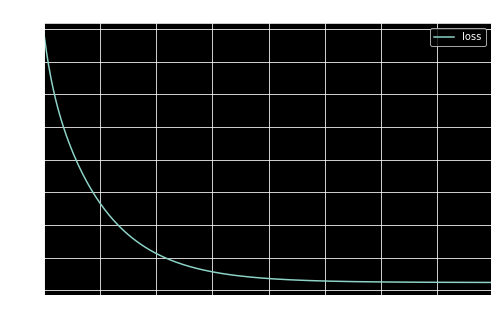

In [332]:
import pandas as pd
%matplotlib inline
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Visualize model

* Model is line defined by coefficient `W` and bias (a.k.a. intercept) `b`
* Just need to plot 2 points and link them... 
    * x-axis: let's choose minimum and maximum of `X_train`
    * y-axis: given by model's predictions

In [333]:
Y_predict = model.predict(X_train)

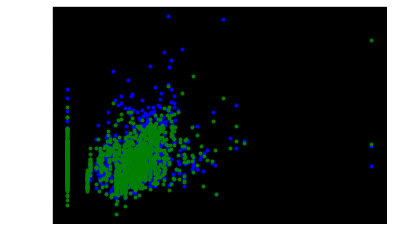

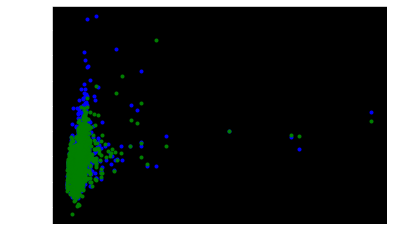

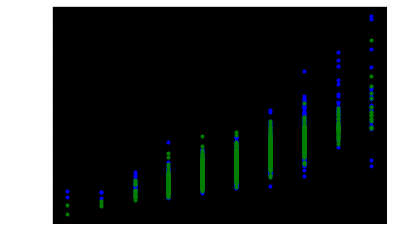

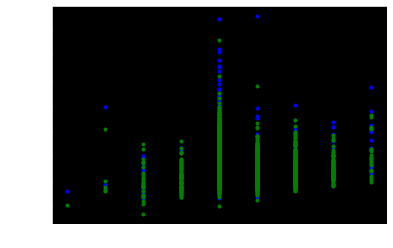

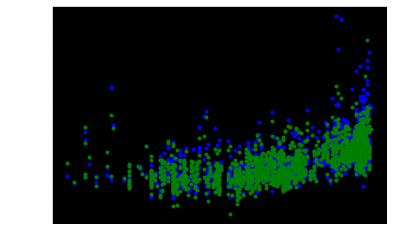

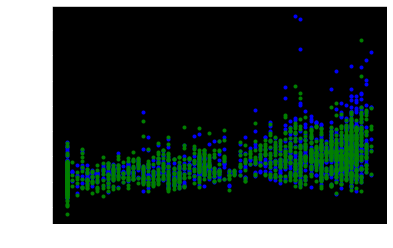

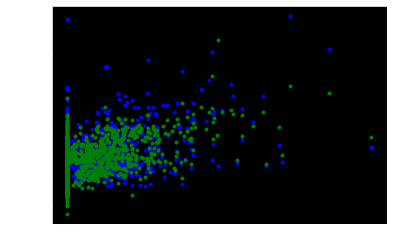

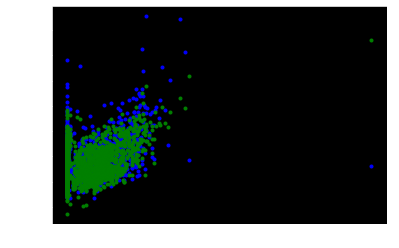

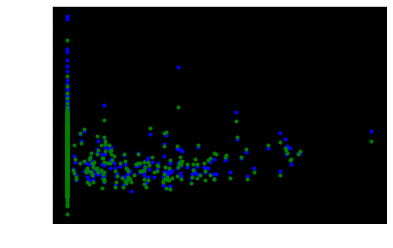

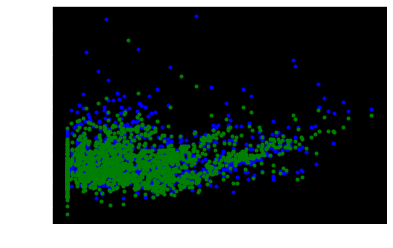

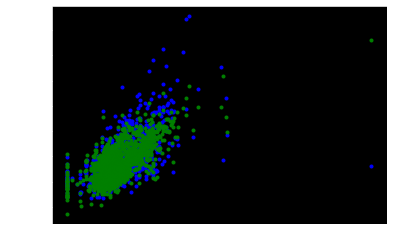

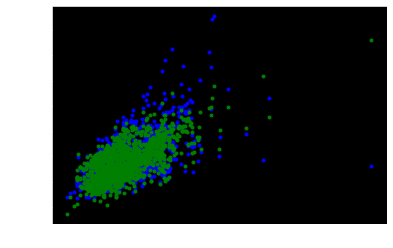

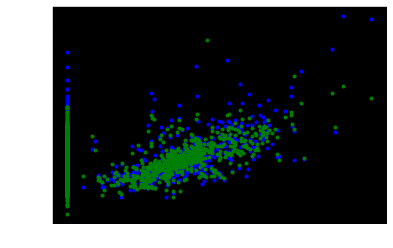

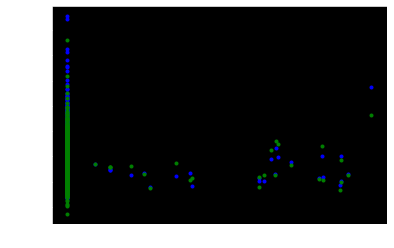

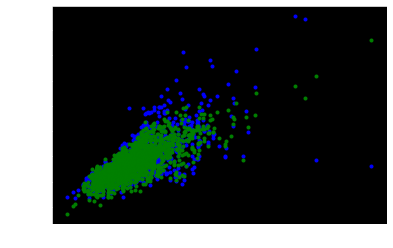

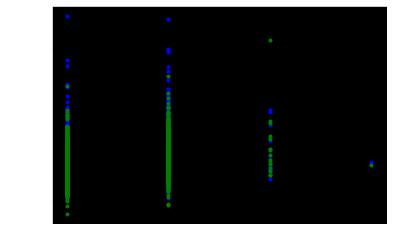

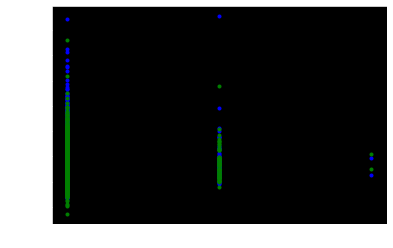

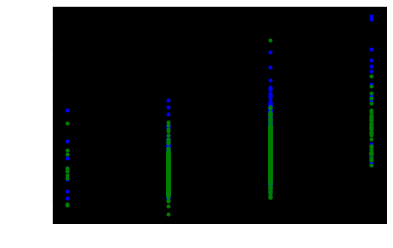

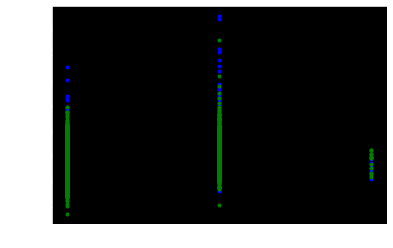

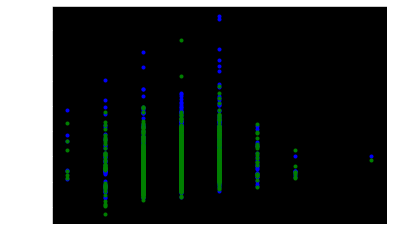

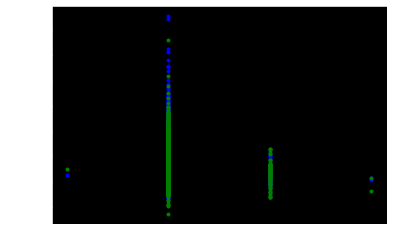

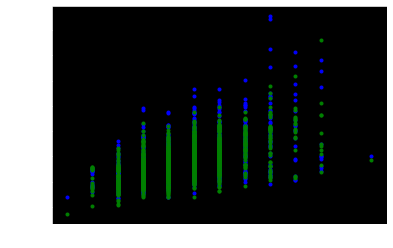

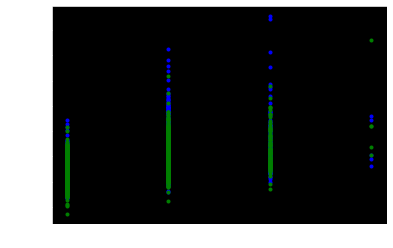

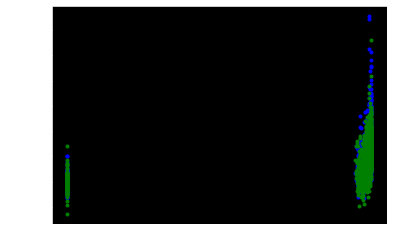

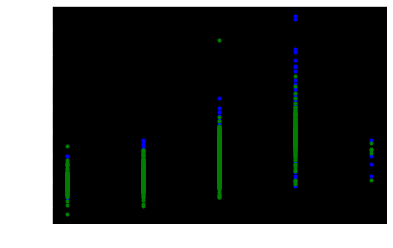

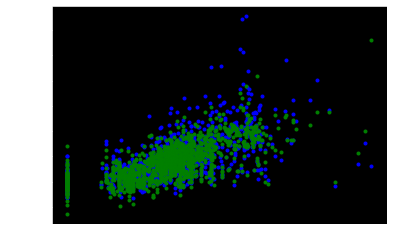

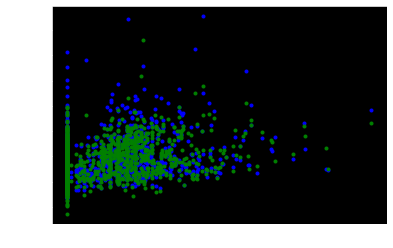

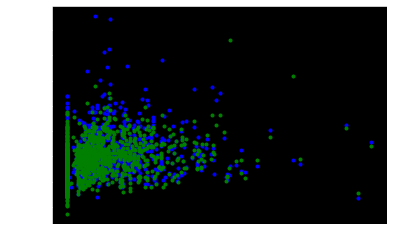

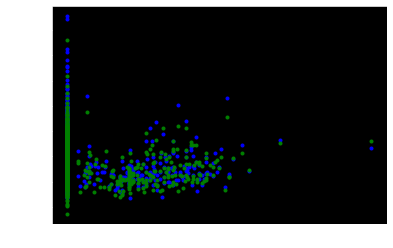

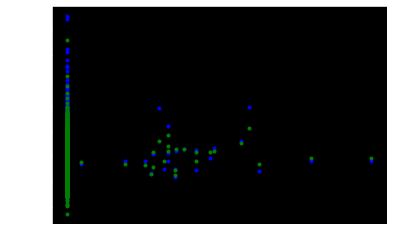

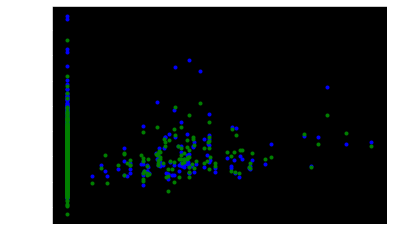

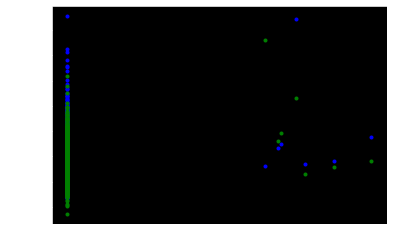

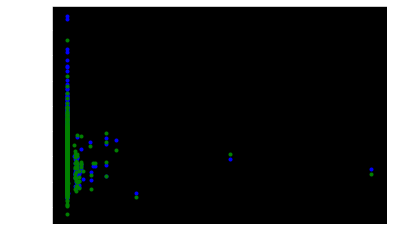

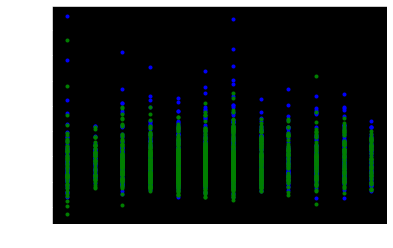

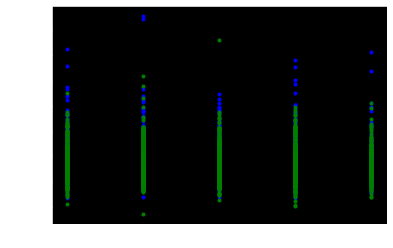

In [334]:
features_number = X_train.shape[1]
for i in range(features_number):
    plt.subplot(1,1,1)
    plt.plot(X_train[:,i], Y_train, "b.")
    plt.plot(X_train[:,i], Y_predict, "g.")
    plt.show()

In [335]:
from sklearn import metrics
#print('MSLE : ', metrics.mean_squared_log_error(Y_train, Y_predict))
print('MAE : ', metrics.mean_absolute_error(Y_train, Y_predict)) 

MAE :  20939.957662671233


Might want to increase learning rate?

## Change learning rate

### Learning rate too small

The loss decrease is too slow

![Gradient Descent with a small learning step - Aurélien Géron](figures/GD-small-learning-rate-Geron.png)

(See Figure 4-4 in _Hands-on ML_ book by Aurélien Géron)

### Learning rate too big

Depending on the initialization, it could converge slowly, or it could diverge 

![Gradient Descent with a big learning step - Aurélien Géron](figures/GD-big-learning-rate-Geron.png)

(See Figure 4-5 in _Hands-on ML_ book by Aurélien Géron)

# Génération prédictions sur test et envoi

In [336]:
X_train.shape

(1460, 35)

In [337]:
test.shape

(1459, 35)

In [338]:
test_predict = model.predict(test)
test_predict

array([[117558.28],
       [155490.1 ],
       [175947.23],
       ...,
       [186655.92],
       [114831.63],
       [249195.12]], dtype=float32)

In [339]:
test_predict.shape

(1459, 1)

In [340]:
test_predict = test_predict.reshape(test_predict.shape[0])

In [341]:
test_predict.shape

(1459,)

## Mise au format final

In [342]:
submission = pandas.DataFrame({'Id': range(1461, 2920), 'SalePrice': test_predict})
submission

,Id,SalePrice
0,1461,117558.281250
1,1462,155490.093750
2,1463,175947.234375
3,1464,200117.468750
4,1465,196431.875000
...,...,...
1454,2915,81506.687500
1455,2916,76161.976562
1456,2917,186655.921875
1457,2918,114831.632812


In [343]:
submission_file = "test_predict.csv"
submission.to_csv(submission_file, index=False)

In [344]:
import kaggle
competition = 'house-prices-advanced-regression-techniques'

In [345]:
#kaggle.api.competition_submit(submission_file, "03-keras-with-quant", competition)

In [346]:
kaggle.api.competitions_submissions_list(competition)

[{'ref': 13599039,
  'totalBytes': 21622,
  'date': '2019-12-03T10:54:28.94Z',
  'description': '03-keras-with-quant',
  'errorDescription': None,
  'fileName': 'test_predict.csv',
  'publicScore': '0.29167',
  'privateScore': None,
  'status': 'complete',
  'submittedBy': 'laurent33',
  'submittedByRef': 'laurent33',
  'teamName': 'laurent33',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/13599039/13599039.raw'},
 {'ref': 13598900,
  'totalBytes': 23828,
  'date': '2019-12-03T10:41:03.64Z',
  'description': '03-keras-with-quant',
  'errorDescription': None,
  'fileName': 'test_predict.csv',
  'publicScore': '6.31162',
  'privateScore': None,
  'status': 'complete',
  'submittedBy': 'laurent33',
  'submittedByRef': 'laurent33',
  'teamName': 'laurent33',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/13598900/13598900.raw'},
 {'ref': 13598877,
  'totalBytes': 23828,
  'date': '2019-12-03T10:37:37Z',
  'description': '03-keras-with-quant',
  'err